# Introduction
Lending club is a company which brings borrowers and investers together, altering the way people acquire loans. Lending club, in this dataset, complete data for all the loans provided from 2007 to 2015 with more than 22 million records including the status of loan i.e. whether a loan was paid on time or defaulted etc. The data can be found on [this link](https://www.kaggle.com/wendykan/lending-club-loan-data). 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import calendar
import datetime
import warnings
import matplotlib.pyplot as plt
import sys
from datetime import datetime
warnings.filterwarnings('ignore')

In [6]:
os.chdir("C://Users//uzair//Codes/Classification\\Credit Risk Modeling")
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

# Importing dataset and Preprocessing
As the data is big, I have added a code to get the sample dataset incase if the code becomes slow or the kernel crashes.

In [31]:
data = pd.read_csv("loan.csv")

# sample_df = data.sample(frac=0.25, random_state=1, replace=True)
# print(sample_df.shape)
# sample_df.head()

In [32]:
## Get backup dataset 
backup = data.copy()
# data = backup.copy()

In [33]:
data.drop(['id', 'member_id'], axis=1, inplace=True)

In [34]:
print("Shape of the Dataset:", data.shape)

Shape of the Dataset: (2260668, 143)


## Brief Exploratory Data Analysis

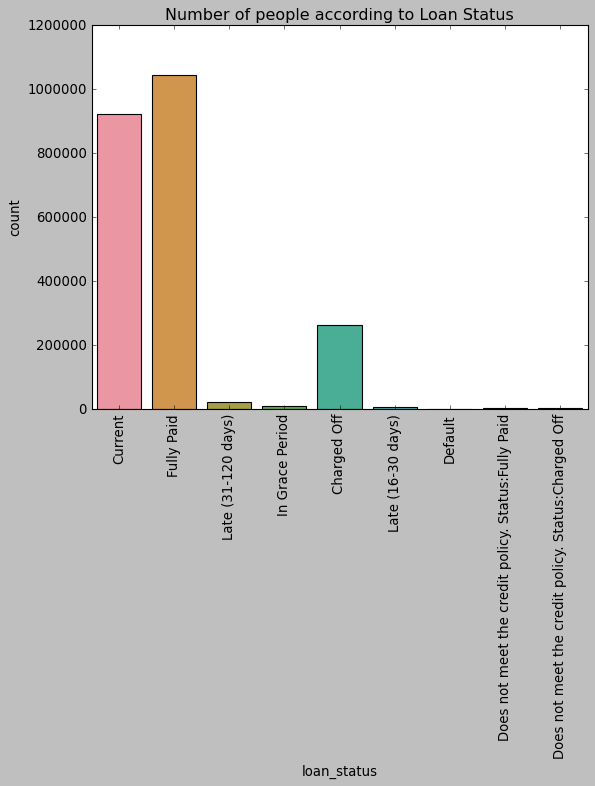

In [38]:
plt.style.use('classic')
sns.countplot(x=data['loan_status'])
plt.title('Number of people according to Loan Status')
plt.xticks(rotation = 90)
plt.show()

This variable will be used as target variable in our logistic regression model. This variable has class imbalance problem. We can deal with this problem with the help of oversampling or undersampling.

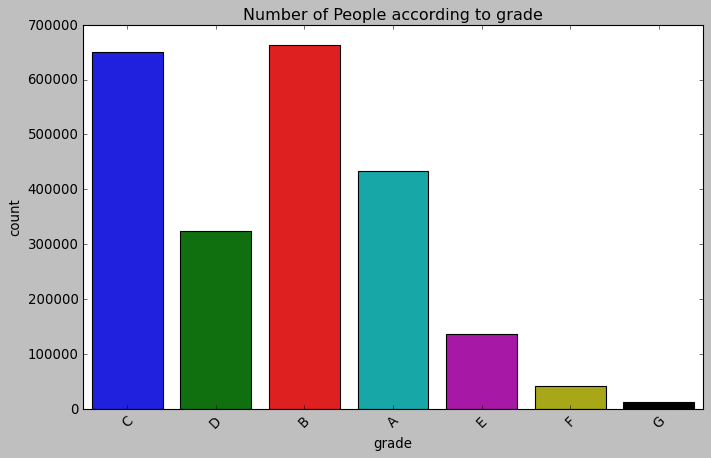

In [39]:
plt.style.use('classic')
plt.figure(figsize=(10, 6))

sns.countplot(x= data['grade'])
plt.title('Number of People according to grade')
plt.xticks(rotation = 45)
plt.show()

Grade is the rating from agency which explains the creditworthiness of the borrower. Grade A is the highest rating which means that the borrower is more likely to repay the loan on time whereas grade G is the lower rating, suggesting the lower creditworthiness of the borrower.

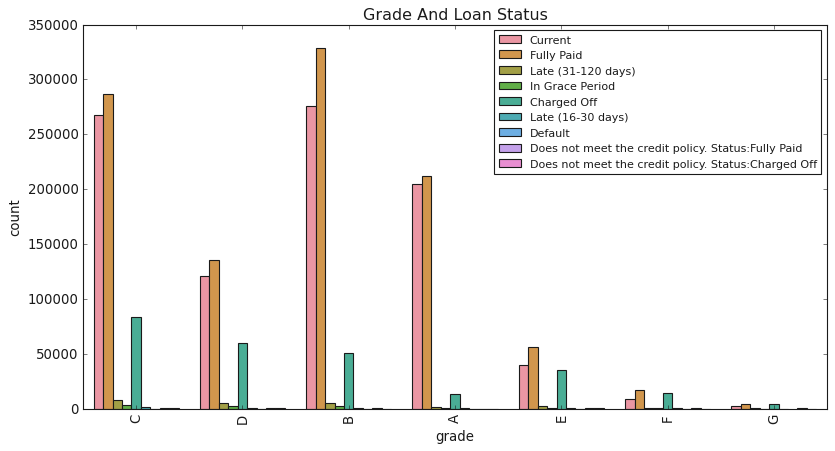

In [45]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 6))
plt.style.use('classic')
sns.countplot(data['grade'], 
              hue = data['loan_status'], dodge=True)
plt.title('Grade And Loan Status')
plt.legend(prop={"size":10})
plt.xticks(rotation = 90)
plt.show()

The plot above clearly shows that people with higher credit ratings have paid their loans. The percentage of default increased as the rating decreased.

## Extracting numeric values from columns

Looking at the first 5 rows, we can see that some columns that are actually numeric, like emp_length, term, subgrade etc, are recorded as strings due to alphabets and + sign. We will simply extract numeric values from that column and store it new variable.

In [46]:
data['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [47]:
data['emp_length_new'] = data['emp_length'].str.extract('(\d+)')
data['emp_length_new'] = pd.to_numeric(data['emp_length_new'])


In [48]:
data['emp_length_new'].describe()

count    2.113761e+06
mean     6.021241e+00
std      3.585463e+00
min      1.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      1.000000e+01
max      1.000000e+01
Name: emp_length_new, dtype: float64

In [49]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [50]:
data['term_new'] = data['term'].str.extract('(\d+)')
data['term_new'] = pd.to_numeric(data['term_new'])

In [51]:
data['term_new'].head()

0    36
1    60
2    36
3    36
4    60
Name: term_new, dtype: int64

In [52]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_new,term_new
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,10.0,36
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,10.0,60
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt c

## Getting Dates

We have few strings that are actually date, so we will convert all those columns to date type.

In [53]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%Y')
data['issue_date'] = pd.to_datetime(data['issue_d'], format='%b-%Y')
data['last_pymnt_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%Y')
data['next_pymnt_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%Y')
data['last_credit_pull_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%Y')
data['debt_settlement_flag_date'] = pd.to_datetime(data['debt_settlement_flag_date'], format='%b-%Y')

In [54]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_new,term_new,earliest_cr_line_date,issue_date,last_pymnt_date,next_pymnt_date,last_credit_pull_date
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaT,NaN,NaN,NaN,NaN,NaN,10.0,36,2001-04-01,2018-12-01,2019-02-01,2019-03-01,2019-02-01
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaT,NaN,NaN,NaN,NaN,NaN,10.0,60,1987-06-01,20

Now we will get the difference in months from earliest credit line date till now.

In [55]:
print(datetime.now())

2020-07-25 08:23:59.374619


In [56]:
data['diff_from_er_crline_months'] = round(pd.to_numeric((pd.to_datetime('2020-07-24') - data['earliest_cr_line_date'])/np.timedelta64(1, "M")))
data['diff_from_issuedate_months'] = round(pd.to_numeric((pd.to_datetime('2020-07-24') - data['issue_date'])/np.timedelta64(1, "M")))

In [57]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_new,term_new,earliest_cr_line_date,issue_date,last_pymnt_date,next_pymnt_date,last_credit_pull_date,diff_from_er_crline_months,diff_from_issuedate_months
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaT,NaN,NaN,NaN,NaN,NaN,10.0,36,2001-04-01,2018-12-01,2019-02-01,2019-03-01,2019-02-01,232.0,20.0
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [58]:
data[['grade', 'sub_grade']].head()

,grade,sub_grade
0,C,C1
1,D,D2
2,D,D1
3,D,D2
4,C,C4


## Dropping few string columns

In [59]:
col = ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'issue_d',
      'earliest_cr_line', 'term', 'emp_length', 'title', 'url', 'desc', 'zip_code']

new_data = data.drop(col, axis=1)
new_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_new,term_new,earliest_cr_line_date,issue_date,last_pymnt_date,next_pymnt_date,last_credit_pull_date,diff_from_er_crline_months,diff_from_issuedate_months
0,2500,2500,2500.0,13.56,84.92,C,C1,Chef,RENT,55000.0,Not Verified,Current,n,debt_consolidation,NY,18.24,0.0,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,84.92,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaT,NaN,NaN,NaN,NaN,NaN,10.0,36,2001-04-01,2018-12-01,2019-02-01,2019-03-01,2019-02-01,232.0,20.0
1,30000,30000,30000.0,18.94,777.23,D,D2,Postmaster,MORTGAGE,90000.0,Source Verified,Current,n,debt_consolidation,LA,26.52,0.0,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,777.23,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaT,NaN,NaN,NaN,NaN,NaN,10.0,60,1987-06-01,2018-12-01,2019-02-01,2019-03-01,2019-02-01,398.0,20.0
2,5000,5000,5000.0,17.97,180.69,D,D1,Administrative,MORTGAGE,59280.0,Source Verified,Current,n,debt_consolidation,MI,10.51,0.0,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,3

## Extracting the month and year into different columns
I have added this code in comments incase the we extract months and years from the date columns.

In [60]:
# new_data['earliest_cr_line_year'] = pd.DatetimeIndex(new_data['earliest_cr_line_date']).year
# new_data['earliest_cr_line_month'] = pd.DatetimeIndex(new_data['earliest_cr_line_date']).month
# new_data['issue_year'] = pd.DatetimeIndex(new_data['issue_date']).year
# new_data['issue_month'] = pd.DatetimeIndex(new_data['issue_date']).month
# new_data['last_pymnt_year'] = pd.DatetimeIndex(new_data['last_pymnt_date']).year
# new_data['last_pymnt_month'] = pd.DatetimeIndex(new_data['last_pymnt_date']).month
# new_data['next_pymnt_year'] = pd.DatetimeIndex(new_data['next_pymnt_date']).year
# new_data['next_pymnt_month'] = pd.DatetimeIndex(new_data['next_pymnt_date']).month
# new_data['last_credit_pull_year'] = pd.DatetimeIndex(new_data['last_credit_pull_date']).year
# new_data['last_credit_pull_month'] = pd.DatetimeIndex(new_data['last_credit_pull_date']).month
# new_data['debt_settlement_flag_year'] = pd.DatetimeIndex(new_data['debt_settlement_flag_date']).year
# new_data['debt_settlement_flag_month'] = pd.DatetimeIndex(new_data['debt_settlement_flag_date']).month
# new_data.head()

## Removing Date columns

In [61]:
col = ['earliest_cr_line_date', 'issue_date', 'last_pymnt_date', 'next_pymnt_date', 'last_credit_pull_date',
      'debt_settlement_flag_date']

new_data_cleaned = new_data.drop(col, axis=1)
new_data_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_new,term_new,diff_from_er_crline_months,diff_from_issuedate_months
0,2500,2500,2500.0,13.56,84.92,C,C1,Chef,RENT,55000.0,Not Verified,Current,n,debt_consolidation,NY,18.24,0.0,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,84.92,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,10.0,36,232.0,20.0
1,30000,30000,30000.0,18.94,777.23,D,D2,Postmaster,MORTGAGE,90000.0,Source Verified,Current,n,debt_consolidation,LA,26.52,0.0,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,777.23,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,10.0,60,398.0,20.0
2,5000,5000,5000.0,17.97,180.69,D,D1,Administrative,MORTGAGE,59280.0,Source Verified,Current,n,debt_consolidation,MI,10.51,0.0,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,180.69,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,110299.0,0.0,1.0,0.0,2.0,14.0,7150.0,72.0,0.0,2.0,0.0,35.0,24100.0,1.0,5.0,0.0,4.0,18383.0,13800.0,0.0,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.0,NaN,14.0,Na

In [62]:
new_data_cleaned['good_bad'] = np.where(new_data_cleaned['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Default',
                                                              'Does not meet the credit policy. Status:Charged Off']),
                             0, 1)
backup_new = new_data_cleaned.copy()
# backup_new.drop('loan_status', axis = 1, inplace = True)

In [65]:
new_data_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_new,term_new,diff_from_er_crline_months,diff_from_issuedate_months,good_bad
0,2500,2500,2500.0,13.56,84.92,C,C1,Chef,RENT,55000.0,Not Verified,Current,n,debt_consolidation,NY,18.24,0.0,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,84.92,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,10.0,36,232.0,20.0,1
1,30000,30000,30000.0,18.94,777.23,D,D2,Postmaster,MORTGAGE,90000.0,Source Verified,Current,n,debt_consolidation,LA,26.52,0.0,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,777.23,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,10.0,60,398.0,20.0,1
2,5000,5000,5000.0,17.97,180.69,D,D1,Administrative,MORTGAGE,59280.0,Source Verified,Current,n,debt_consolidation,MI,10.51,0.0,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,180.69,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,110299.0,0.0,1.0,0.0,2.0,14.0,7150.0,72.0,0.0,2.0,0.0,35.0,24100.0,1.0,5.0,0.0,4.0,18383.0,13800.0,0.0,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.

#### EDA after creation of good/bad variable

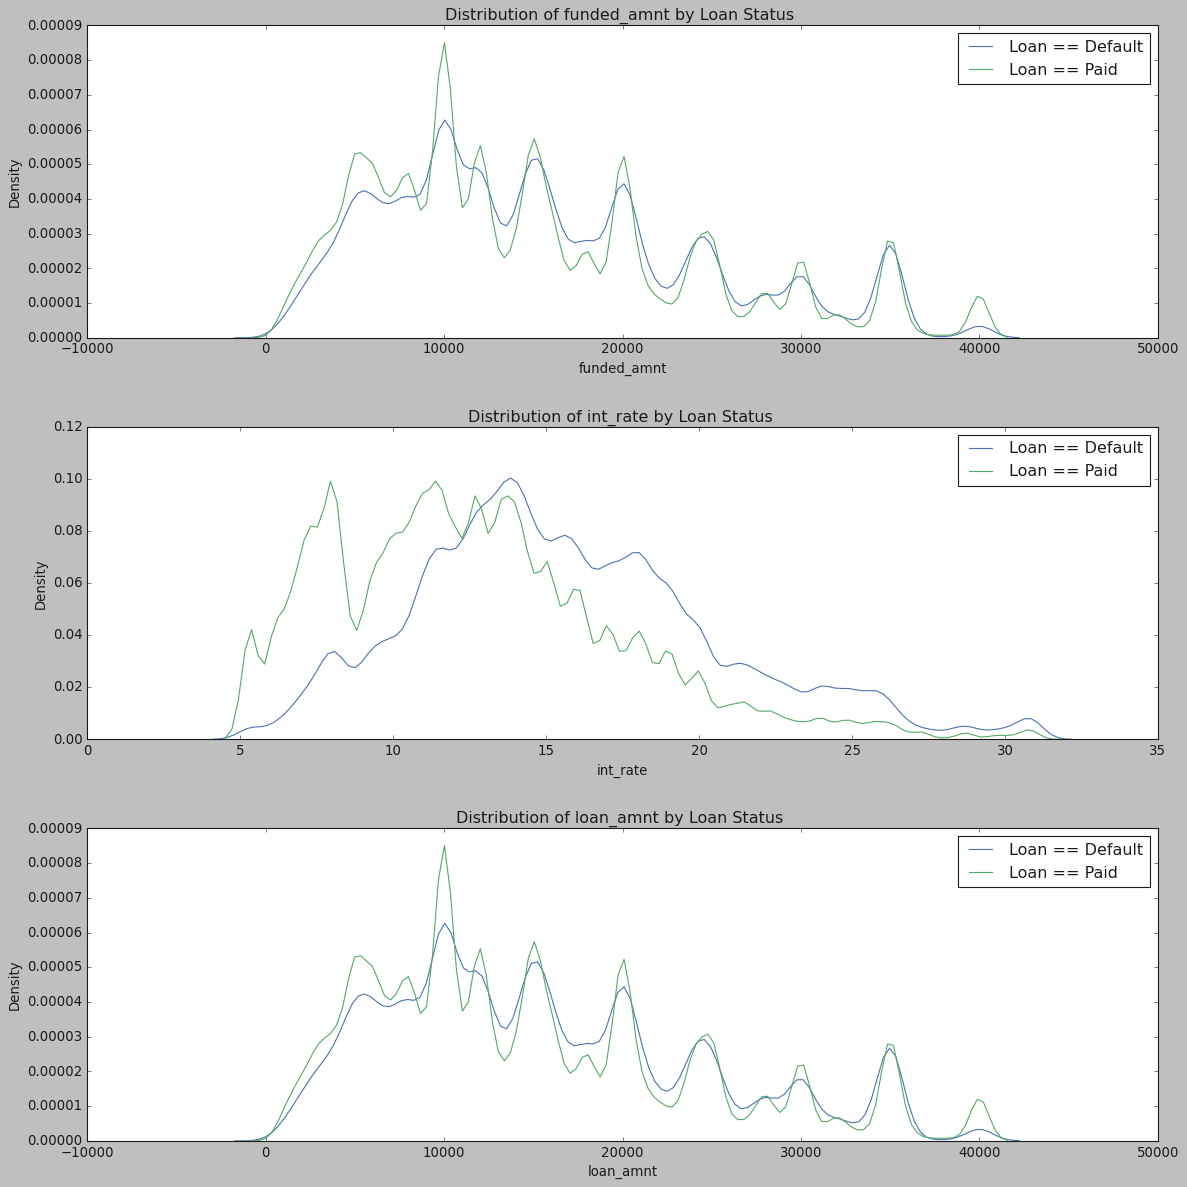

In [71]:
plt.figure(figsize = (15, 15))
# iterate through the sources
for i, source in enumerate(['funded_amnt', 'int_rate', 'loan_amnt']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(new_data_cleaned.loc[new_data_cleaned['good_bad'] == 0, source], label = 'Loan == Default')
    sns.kdeplot(new_data_cleaned.loc[new_data_cleaned['good_bad'] == 1, source], label = 'Loan == Paid')
    # Label the plots
    plt.title('Distribution of %s by Loan Status ' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)
plt.show()

It seems that the number of default increases as the interest rate increases, which seems obvious as people have to pay more.

### Get dummies

In [72]:
dummies = [pd.get_dummies(backup_new['grade'], prefix='grade', prefix_sep='_'),
          pd.get_dummies(backup_new['sub_grade'], prefix='sub_grade', prefix_sep='_'),
          pd.get_dummies(backup_new['purpose'], prefix='purpose', prefix_sep='_'),
          pd.get_dummies(backup_new['home_ownership'], prefix='home_ownership', prefix_sep='_'),
          pd.get_dummies(backup_new['verification_status'], prefix='verification_status', prefix_sep='_'),
          pd.get_dummies(backup_new['initial_list_status'], prefix='initial_list_status', prefix_sep='_'),
          pd.get_dummies(backup_new['addr_state'], prefix='addr_state', prefix_sep='_')]

dummies = pd.concat(dummies, axis=1)
print(dummies.shape)
dummies.head()

(2260668, 118)


,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
dummies_df = pd.concat([backup_new, dummies], axis= 1)
print(dummies_df.shape)
dummies_df.head()

(2260668, 254)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_new,term_new,diff_from_er_crline_months,diff_from_issuedate_months,good_bad,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0

## Missing Values
Lets locate the missing values and the percentage so that we can decide whether to impute the missing values or drop the entire column. 

In [74]:
missing = dummies_df.isnull().sum()
missing = missing[missing > 0]

missing_data = pd.DataFrame({'features': missing.index,
                            'values':missing.values,
                            'percentage':missing.values/len(dummies_df)})
missing_data = missing_data.sort_values(by = 'values', ascending = False)


In [75]:
print(missing_data.head(20))

                                       features   values  percentage
93   orig_projected_additional_accrued_interest  2252242    0.996273
85                                deferral_term  2250055    0.995305
94               hardship_payoff_balance_amount  2250055    0.995305
90                              hardship_length  2250055    0.995305
91                                 hardship_dpd  2250055    0.995305
92                         hardship_loan_status  2250055    0.995305
82                                hardship_type  2250055    0.995305
83                              hardship_reason  2250055    0.995305
89                      payment_plan_start_date  2250055    0.995305
95                 hardship_last_payment_amount  2250055    0.995305
84                              hardship_status  2250055    0.995305
88                            hardship_end_date  2250055    0.995305
87                          hardship_start_date  2250055    0.995305
86                              ha

We have few columns with more than 75 % of the missing values, we cannot impute values without any information. I will remove all columns with more than 75% of the missing values

In [76]:
remove_columns = missing_data['features'][missing_data['percentage'] > 0.75].tolist()

df = dummies_df.drop(remove_columns, axis=1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,emp_length_new,term_new,diff_from_er_crline_months,diff_from_issuedate_months,good_bad,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,2500,2500,2500.0,13.56,84.92,C,C1,Chef,RENT,55000.0,Not Verified,Current,n,debt_consolidation,NY,18.24,0.0,1.0,NaN,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,84.92,0.0,NaN,1,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N,10.0,36,232.0,20.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [77]:
missing = df.isnull().sum()
missing = missing[missing > 0]

missing_data = pd.DataFrame({'features': missing.index,
                            'values':missing.values,
                            'percentage':missing.values/len(df)})
missing_data = missing_data.sort_values(by = 'values', ascending = False)

In [78]:
missing_data.head()

,features,values,percentage
11,mths_since_last_major_derog,1679893,0.743096
43,mths_since_recent_revol_delinq,1520309,0.672504
5,mths_since_last_delinq,1158502,0.512460
21,il_util,1068850,0.472803
19,mths_since_rcnt_il,909924,0.402502


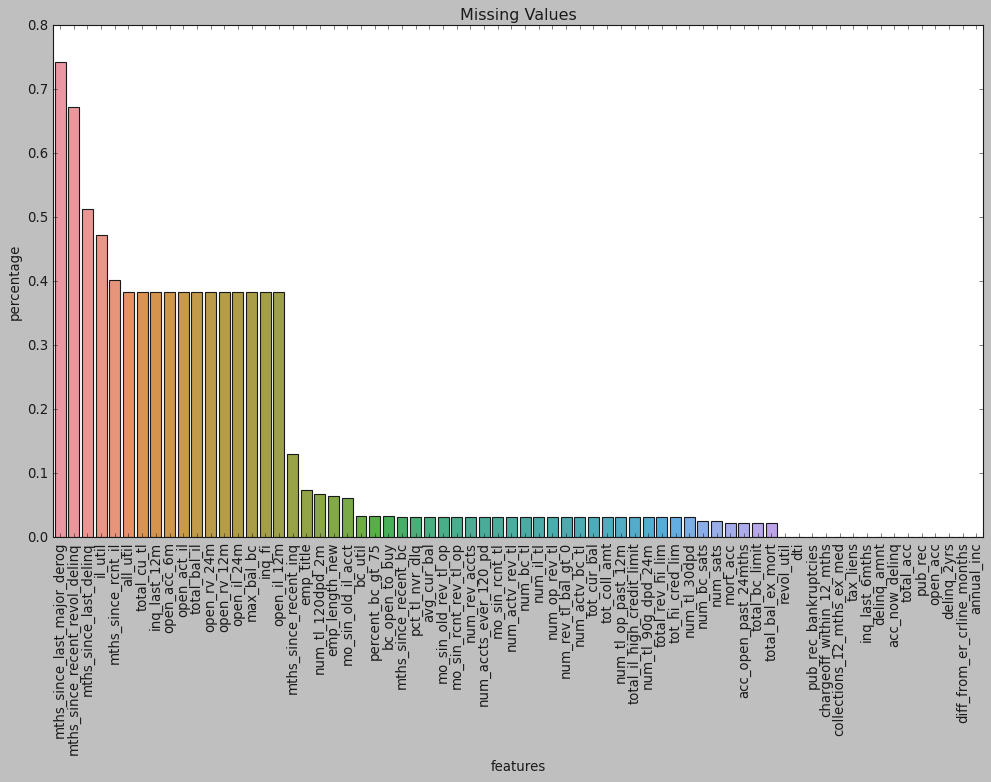

In [79]:
plt.figure(figsize=(15, 8))
sns.barplot(missing_data['features'], missing_data['percentage'], )
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Missing Values')
plt.show()

In [80]:
cols = ['diff_from_er_crline_months','acc_now_delinq','total_acc','pub_rec','open_acc',
        'inq_last_6mths','delinq_2yrs','emp_length_new']

for i in cols:
    df[i] = df[i].fillna(0)
    
    
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,emp_length_new,term_new,diff_from_er_crline_months,diff_from_issuedate_months,good_bad,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,2500,2500,2500.0,13.56,84.92,C,C1,Chef,RENT,55000.0,Not Verified,Current,n,debt_consolidation,NY,18.24,0.0,1.0,NaN,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,84.92,0.0,NaN,1,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N,10.0,36,232.0,20.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [81]:
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].mean())

In [82]:
print(df.shape)
df.head()

(2260668, 219)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,emp_length_new,term_new,diff_from_er_crline_months,diff_from_issuedate_months,good_bad,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,2500,2500,2500.0,13.56,84.92,C,C1,Chef,RENT,55000.0,Not Verified,Current,n,debt_consolidation,NY,18.24,0.0,1.0,NaN,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,84.92,0.0,NaN,1,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N,10.0,36,232.0,20.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

# Data Transformation - Weight of Evidence
I will use weight of evidence method to preprocess the data and select the variables for the logistic regression model.
Weight of evidence will show us how much a particular category is contributing to a particular loan status. Higher weight of evidence will suggest more chances of full repayment of loan and vice versa.

In [83]:
def get_weight_of_evidence(data, column, target):
    woe = data[[column, target]]
    count = woe.groupby(column, as_index=False)[target].count()
    mean = woe.groupby(column, as_index=False)[target].mean()
    data1 = pd.concat([count, mean], axis= 1)
    data1 = data1.iloc[:, [0, 1, 3]]
    data1.columns = [data1.columns.values[0], 'number_of_obs', 'prop_good']
    data1['percentage_of_total'] = data1['number_of_obs']/data1['number_of_obs'].sum()
    data1['number_of_good'] = data1['prop_good'] * data1['number_of_obs']
    data1['number_of_bad'] = (1 - data1['prop_good']) * data1['number_of_obs']
    data1['prop_n_good'] = data1['number_of_good']/data1['number_of_good'].sum()
    data1['prop_n_bad'] = data1['number_of_bad']/data1['number_of_bad'].sum()
    data1['weight_of_evidence'] = np.log(data1['prop_n_good']/data1['prop_n_bad'])
    data1 = data1.sort_values('weight_of_evidence', ascending=True)
    data1['information_value'] = (data1['prop_n_good'] - data1['prop_n_bad']) * data1['weight_of_evidence']
    data1['information_value'] = data1['information_value'].sum()
    return(data1)

def plot_by_woe(data, rotation = 0):
    x = np.array(data.iloc[:, 0].apply(str))
    y = data['weight_of_evidence']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(data.columns[0])
    plt.ylabel('Weight_of_evidence')
    plt.title(str('Weight of Evidence of ' + data.columns[0]))
    plt.xticks(rotation = rotation)
    plt.show()
    
def get_weight_of_evidence_numeric(data, column, target):
    woe = data[[column, target]]
    count = woe.groupby(column, as_index=False)[target].count()
    mean = woe.groupby(column, as_index=False)[target].mean()
    data1 = pd.concat([count, mean], axis= 1)
    data1 = data1.iloc[:, [0, 1, 3]]
    data1.columns = [data1.columns.values[0], 'number_of_obs', 'prop_good']
    data1['percentage_of_total'] = data1['number_of_obs']/data1['number_of_obs'].sum()
    data1['number_of_good'] = data1['prop_good'] * data1['number_of_obs']
    data1['number_of_bad'] = (1 - data1['prop_good']) * data1['number_of_obs']
    data1['prop_n_good'] = data1['number_of_good']/data1['number_of_good'].sum()
    data1['prop_n_bad'] = data1['number_of_bad']/data1['number_of_bad'].sum()
    data1['weight_of_evidence'] = np.log(data1['prop_n_good']/data1['prop_n_bad'])
#   data1 = data1.sort_values('weight_of_evidence', ascending=True)
    data1['information_value'] = (data1['prop_n_good'] - data1['prop_n_bad']) * data1['weight_of_evidence']
    data1['information_value'] = data1['information_value'].sum()
    return(data1)

    

## Categorical Columns

### Grade

In [84]:
grade_woe = get_weight_of_evidence(data = df, column='grade', target='good_bad')
grade_woe

,grade,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
6,G,12168,0.604701,0.005382,7358.0,4810.0,0.003723,0.016916,-1.513718,0.48162
5,F,41800,0.639330,0.018490,26724.0,15076.0,0.013522,0.053020,-1.366351,0.48162
4,E,135639,0.721673,0.060000,97887.0,37752.0,0.049530,0.132769,-0.986034,0.48162
3,D,324424,0.800782,0.143508,259793.0,64631.0,0.131453,0.227299,-0.547618,0.48162
2,C,650053,0.859921,0.287549,558994.0,91059.0,0.282845,0.320242,-0.124178,0.48162
1,B,663557,0.915718,0.293523,607631.0,55926.0,0.307455,0.196684,0.446729,0.48162
0,A,433027,0.965152,0.191548,417937.0,15090.0,0.211472,0.053070,1.382489,0.48162


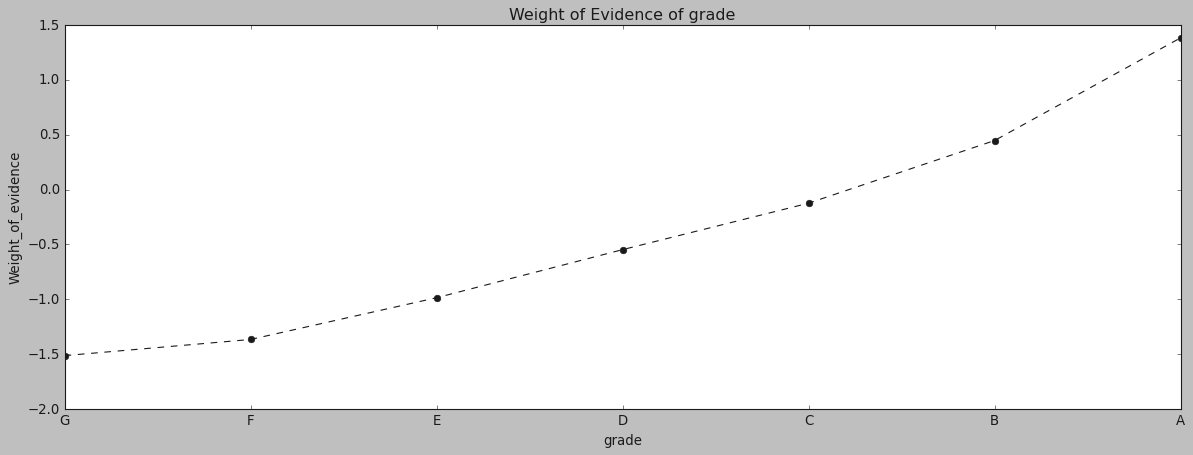

In [85]:
plot_by_woe(grade_woe)

So the lower the weight of evidence the higher the risk of default. Looking at the graph above, we can clearly see that higher credit rating results in lower chances of default. In this variable, I will keep all dummy variables except grade G as the number of observations and weight of evidence is low.

### Home OwnerShip

In [86]:
home_df = get_weight_of_evidence(data=df, column='home_ownership', target= 'good_bad')
home_df.head(7)

,home_ownership,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
3,OTHER,182,0.791209,0.000081,144.0,38.0,0.000073,0.000134,-0.606582,0.025063
2,NONE,54,0.851852,0.000024,46.0,8.0,0.000023,0.000028,-0.189609,0.025063
5,RENT,894929,0.853602,0.395869,763913.0,131016.0,0.386532,0.460766,-0.175675,0.025063
4,OWN,253057,0.874333,0.111939,221256.0,31801.0,0.111953,0.111840,0.001014,0.025063
1,MORTGAGE,1111450,0.890759,0.491647,990034.0,121416.0,0.500947,0.427004,0.159708,0.025063
0,ANY,996,0.934739,0.000441,931.0,65.0,0.000471,0.000229,0.723063,0.025063


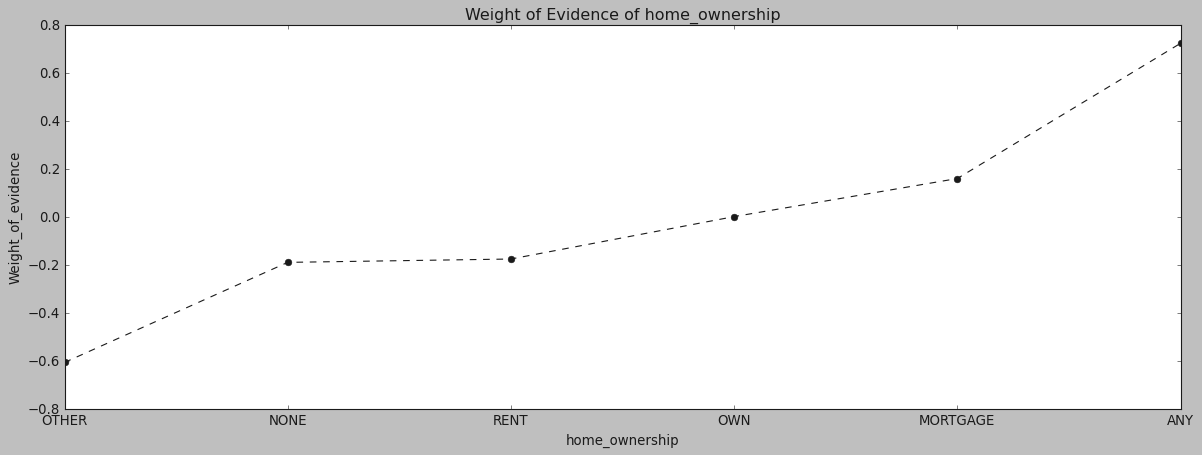

In [87]:
plot_by_woe(data=home_df)

This category is slightly more complicated. The number of observation for other, none, and any cateogory is low but the weight of evidence is high for ANY.

### Address State

In [88]:
addr_woe = get_weight_of_evidence(data=df, column='addr_state', target='good_bad')
addr_woe

,addr_state,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
12,IA,14,0.785714,0.000006,11.0,3.0,0.000006,0.000011,-0.639526,0.014428
1,AL,27284,0.847970,0.012069,23136.0,4148.0,0.011707,0.014588,-0.220046,0.014428
2,AR,17074,0.851060,0.007553,14531.0,2543.0,0.007353,0.008943,-0.195869,0.014428
25,MS,12639,0.852678,0.005591,10777.0,1862.0,0.005453,0.006548,-0.183046,0.014428
18,LA,25759,0.852867,0.011394,21969.0,3790.0,0.011116,0.013329,-0.181543,0.014428
36,OK,20691,0.853221,0.009153,17654.0,3037.0,0.008933,0.010681,-0.178717,0.014428
33,NV,32657,0.857427,0.014446,28001.0,4656.0,0.014168,0.016375,-0.144726,0.014428
32,NM,11986,0.861171,0.005302,10322.0,1664.0,0.005223,0.005852,-0.113756,0.014428
34,NY,186389,0.861971,0.082449,160662.0,25727.0,0.081293,0.090478,-0.107047,0.014428
11,HI,10668,0.863705,0.004719,9214.0,1454.0,0.004662,0.005114,-0.092403,0.014428


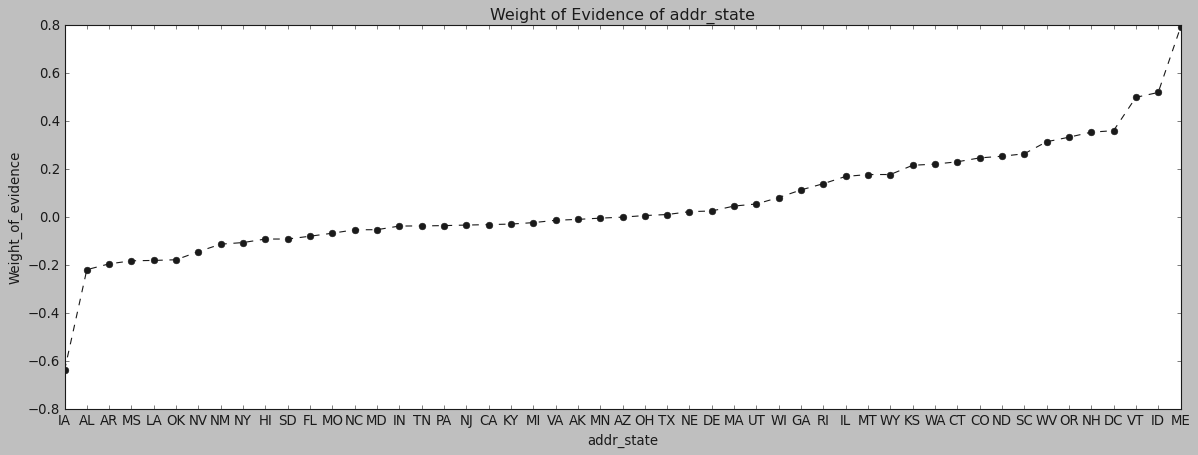

In [89]:
plot_by_woe(addr_woe)

This is a bit more complicated to preprocess, as we can see that IA state has only 14 observations and the weight of evidence is extremely low as compare to other states. In order to combine similar categories, we will take into account the number of observations and weight of evidence.

In [90]:
df['addr_state_IA_AL_AR'] = sum([df['addr_state_IA'],df['addr_state_AL'],
                                             df['addr_state_AR']])
df['addr_state_MS_LA_OK'] = sum([df['addr_state_MS'], df['addr_state_LA'],
                                df['addr_state_OK']])
df['addr_state_NV_NM'] = sum([df['addr_state_NV'], df['addr_state_NM']])
df['addr_state_HI_SD'] = sum([df['addr_state_HI'], df['addr_state_SD']])
df['addr_state_NC_MD'] = sum([df['addr_state_NC'], df['addr_state_MD']])
df['addr_state_IN_TN'] = sum([df['addr_state_IN'], df['addr_state_TN']])
df['addr_state_PA_NJ'] = sum([df['addr_state_PA'], df['addr_state_NJ']])
df['addr_state_KY_MI_VA_AK'] = sum([df['addr_state_KY'], df['addr_state_MI'], 
                                    df['addr_state_VA'],  df['addr_state_AK']])
df['addr_state_MN_AZ_OH'] = sum([df['addr_state_MN'], df['addr_state_AZ'], 
                                    df['addr_state_OH']])

df['addr_state_NE_DE'] = sum([df['addr_state_NE'], df['addr_state_DE']])


df['addr_state_MA_UT'] = sum([df['addr_state_MA'], df['addr_state_UT']])
df['addr_state_WI_GA_RI'] = sum([df['addr_state_WI'], df['addr_state_GA'],
                                df['addr_state_RI']])

df['addr_state_MT_WY_KS_WA_CT_CO_ND_SC'] = sum([df['addr_state_MT'], 
                                                df['addr_state_WY'],df['addr_state_KS'],df['addr_state_WA'],
                                                df['addr_state_CT'], df['addr_state_CO'], df['addr_state_ND'],
                                                df['addr_state_SC']])
df['addr_state_WV_OR_NH_DC'] = sum([df['addr_state_WV'], df['addr_state_OR'], 
                                    df['addr_state_NH'],  df['addr_state_DC']])

df['addr_state_VT_ID_ME'] = sum([df['addr_state_VT'], df['addr_state_ID'],
                                df['addr_state_ME']])

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,emp_length_new,term_new,diff_from_er_crline_months,diff_from_issuedate_months,good_bad,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,addr_state_IA_AL_AR,addr_state_MS_LA_OK,addr_state_NV_NM,addr_state_HI_SD,addr_state_NC_MD,addr_state_IN_TN,addr_state_PA_NJ,addr_state_KY_MI_VA_AK,addr_state_MN_AZ_OH,addr_state_NE_DE,addr_state_MA_UT,addr_state_WI_GA_RI,addr_state_MT_WY_KS_WA_CT_CO_ND_SC,addr_state_WV_OR_NH_DC,addr_state_VT_ID_ME
0,2500,2500,2500.0,13.56,84.92,C,C1,Chef,RENT,55000.0,Not Verified,Current,n,debt_consolidation,NY,18.24,0.0,1.0,NaN,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,84.92,0.0,NaN,1,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0

### Purpose

In [91]:
purpose_woe = get_weight_of_evidence(data=df, column='purpose', target= 'good_bad')
purpose_woe

,purpose,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
3,educational,424,0.792453,0.000188,336.0,88.0,0.000170,0.000309,-0.599035,0.023313
11,small_business,24689,0.801855,0.010921,19797.0,4892.0,0.010017,0.017205,-0.540880,0.023313
10,renewable_energy,1445,0.839446,0.000639,1213.0,232.0,0.000614,0.000816,-0.284695,0.023313
8,moving,15403,0.847238,0.006813,13050.0,2353.0,0.006603,0.008275,-0.225712,0.023313
2,debt_consolidation,1277877,0.863848,0.565265,1103892.0,173985.0,0.558558,0.611882,-0.091181,0.023313
7,medical,27488,0.867870,0.012159,23856.0,3632.0,0.012071,0.012773,-0.056557,0.023313
9,other,139440,0.873336,0.061681,121778.0,17662.0,0.061618,0.062115,-0.008025,0.023313
13,wedding,2355,0.876008,0.001042,2063.0,292.0,0.001044,0.001027,0.016354,0.023313
5,house,14136,0.877264,0.006253,12401.0,1735.0,0.006275,0.006102,0.027961,0.023313
12,vacation,15525,0.880129,0.006867,13664.0,1861.0,0.006914,0.006545,0.054842,0.023313


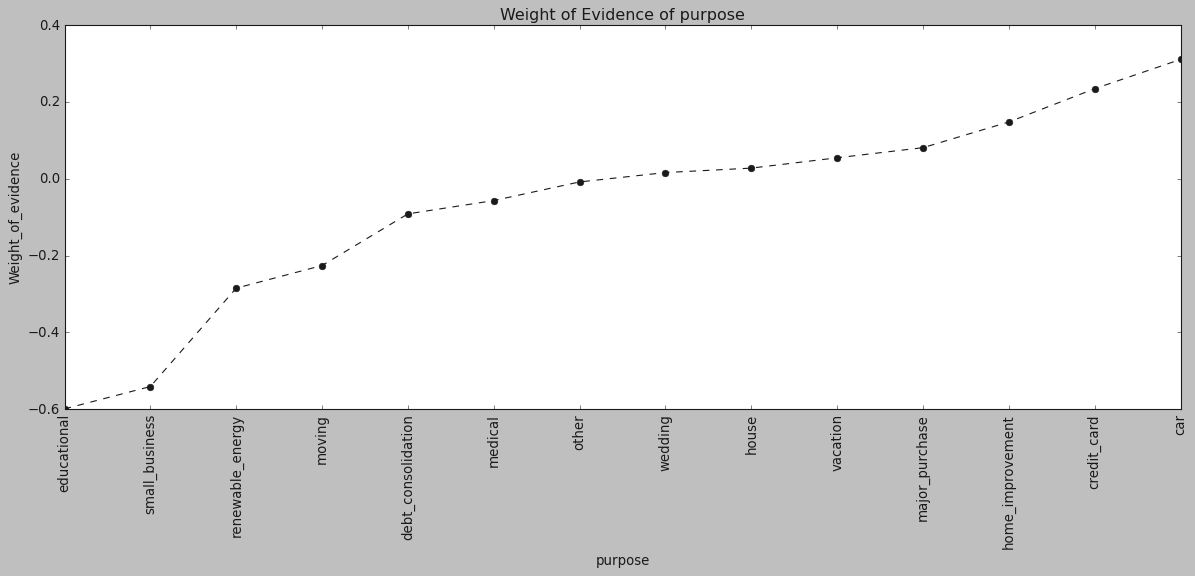

In [92]:
plot_by_woe(purpose_woe, rotation=90)

This category also has the same problem. Again we will perform similar operation to reduce the number of dummy variables

In [93]:
df['purpose_educational_smallbusiness'] = sum([df['purpose_educational'], df['purpose_small_business']])
df['purpose_renewableenergy_moving'] = sum([df['purpose_renewable_energy'], df['purpose_moving']])
df['purpose_medical_other'] = sum([df['purpose_medical'], df['purpose_other']])
df['purpose_wedding_house_vacation'] = sum([df['purpose_wedding'], df['purpose_house'], df['purpose_vacation']])
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,emp_length_new,term_new,diff_from_er_crline_months,diff_from_issuedate_months,good_bad,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,addr_state_IA_AL_AR,addr_state_MS_LA_OK,addr_state_NV_NM,addr_state_HI_SD,addr_state_NC_MD,addr_state_IN_TN,addr_state_PA_NJ,addr_state_KY_MI_VA_AK,addr_state_MN_AZ_OH,addr_state_NE_DE,addr_state_MA_UT,addr_state_WI_GA_RI,addr_state_MT_WY_KS_WA_CT_CO_ND_SC,addr_state_WV_OR_NH_DC,addr_state_VT_ID_ME,purpose_educational_smallbusiness,purpose_renewableenergy_moving,purpose_medical_other,purpose_wedding_house_vacation
0,2500,2500,2500.0,13.56,84.92,C,C1,Chef,RENT,55000.0,Not Verified,Current,n,debt_consolidation,NY,18.24,0.0,1.0,NaN,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,84.92,0.0,NaN,1,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,343

In [94]:
verification_woe = get_weight_of_evidence(data=df, column='verification_status', target='good_bad')
verification_woe

,verification_status,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
2,Verified,629631,0.833671,0.278515,524905.0,104726.0,0.265597,0.368307,-0.326939,0.085349
1,Source Verified,886231,0.869470,0.392022,770551.0,115680.0,0.389891,0.406831,-0.042531,0.085349
0,Not Verified,744806,0.914155,0.329463,680868.0,63938.0,0.344512,0.224861,0.426646,0.085349


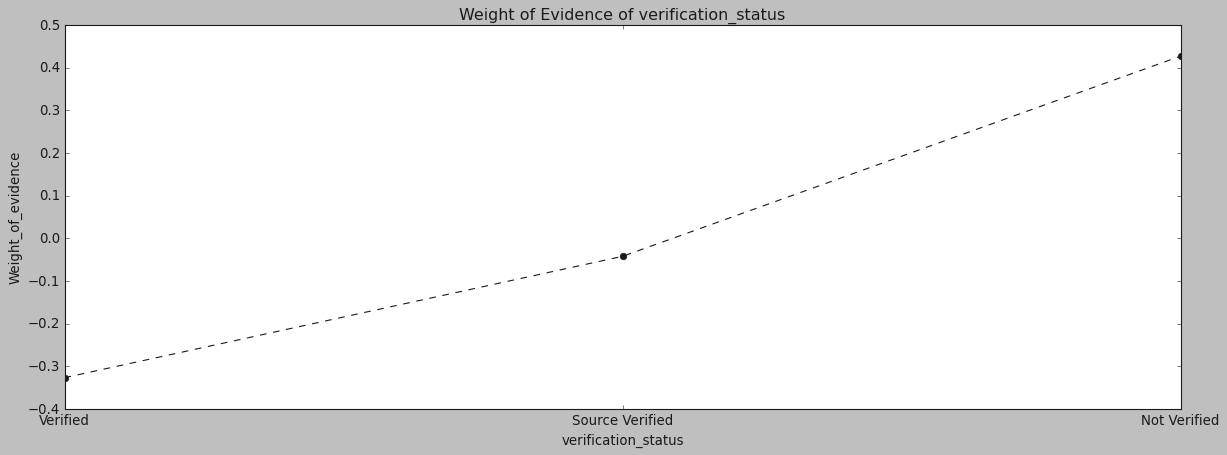

In [95]:
plot_by_woe(verification_woe)

There is alot of difference in the weight of evidence of each category so we will keep all these categories.

### Initial List Status

In [96]:
initial_woe = get_weight_of_evidence(df,'initial_list_status','good_bad')
initial_woe

,initial_list_status,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,f,725201,0.842464,0.320791,610956.0,114245.0,0.309138,0.401784,-0.262129,0.037626
1,w,1535467,0.889220,0.679209,1365368.0,170099.0,0.690862,0.598216,0.143990,0.037626


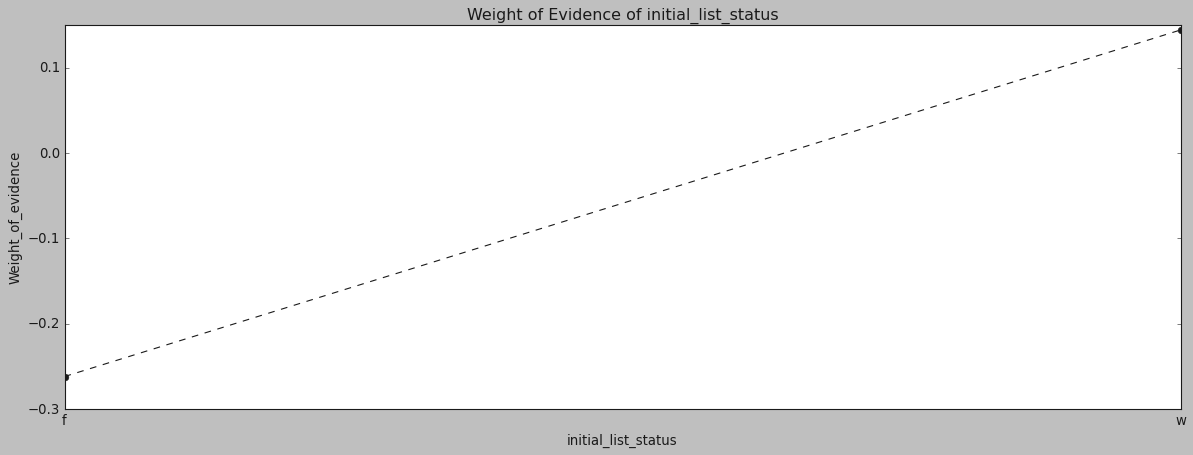

In [97]:
plot_by_woe(initial_woe)

We will keep both of these categories

## Numeric columns

### Term

In [98]:
term_woe = get_weight_of_evidence_numeric(data=df, column='term_new', target='good_bad')
term_woe

,term_new,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,36,1609754,0.892734,0.71207,1437082.0,172672.0,0.727149,0.607264,0.180167,0.065262
1,60,650914,0.828438,0.28793,539242.0,111672.0,0.272851,0.392736,-0.364211,0.065262


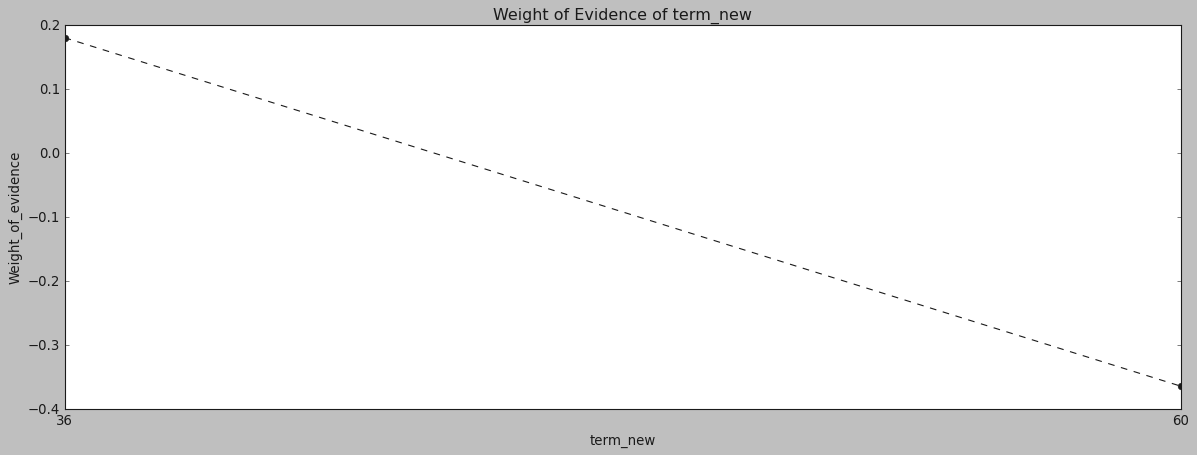

In [99]:
plot_by_woe(term_woe)

In [100]:
df['term_36'] = np.where(df['term_new'] == 36, 1, 0)
df['term_60'] = np.where(df['term_new'] == 60, 1, 0)
df[['term_new', 'term_36', 'term_60']].head()

,term_new,term_36,term_60
0,36,1,0
1,60,0,1
2,36,1,0
3,36,1,0
4,60,0,1


### Employment Length

In [101]:
emp_length_woe = get_weight_of_evidence_numeric(data=df, column='emp_length_new', target='good_bad')
emp_length_woe

,emp_length_new,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,0.0,146907,0.847890,0.064984,124561.0,22346.0,0.063027,0.078588,-0.220661,0.006226
1,1.0,338391,0.872739,0.149686,295327.0,43064.0,0.149432,0.151450,-0.013413,0.006226
2,2.0,203677,0.874458,0.090096,178107.0,25570.0,0.090120,0.089926,0.002156,0.006226
3,3.0,180753,0.873717,0.079956,157927.0,22826.0,0.079909,0.080276,-0.004576,0.006226
4,4.0,136605,0.875993,0.060427,119665.0,16940.0,0.060549,0.059576,0.016209,0.006226
5,5.0,139698,0.874809,0.061795,122209.0,17489.0,0.061837,0.061506,0.005352,0.006226
6,6.0,102628,0.875044,0.045397,89804.0,12824.0,0.045440,0.045100,0.007502,0.006226
7,7.0,92695,0.868558,0.041003,80511.0,12184.0,0.040738,0.042850,-0.050539,0.006226
8,8.0,91914,0.862034,0.040658,79233.0,12681.0,0.040091,0.044597,-0.106521,0.006226
9,9.0,79395,0.866377,0.035120,68786.0,10609.0,0.034805,0.037310,-0.069512,0.006226


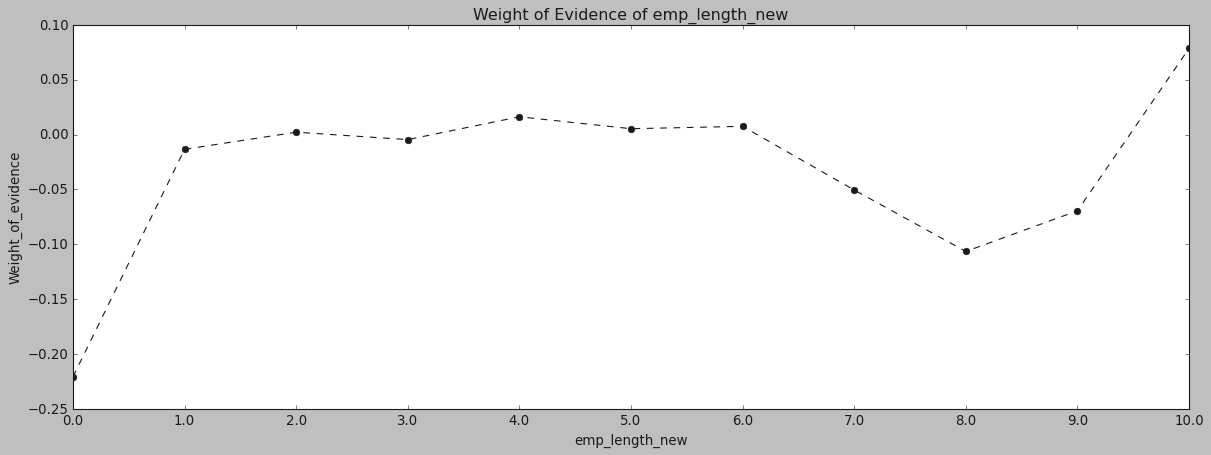

In [102]:
plot_by_woe(emp_length_woe)

In [103]:
df['emp_length:0'] = np.where(df['emp_length_new'] == 0, 1, 0)
df['emp_length:1'] = np.where(df['emp_length_new'] == 1, 1, 0)
df['emp_length:2-3'] = np.where(df['emp_length_new'].isin([2, 3]), 1, 0)
df['emp_length:4-6'] = np.where(df['emp_length_new'].isin([4 , 5, 6]), 1, 0)
df['emp_length:7-9'] = np.where(df['emp_length_new'].isin([7, 8, 9]), 1, 0)
df['emp_length:10'] = np.where(df['emp_length_new'] == 10, 1, 0)
df[['emp_length_new', 'emp_length:2-3','emp_length:4-6', 'emp_length:7-9', 'emp_length:10']].head()

,emp_length_new,emp_length:2-3,emp_length:4-6,emp_length:7-9,emp_length:10
0,10.0,0,0,0,1
1,10.0,0,0,0,1
2,6.0,0,1,0,0
3,10.0,0,0,0,1
4,10.0,0,0,0,1


### Month Difference from Issuedate

In [104]:
df['diff_from_issuedate_months_categories'] = pd.cut(df['diff_from_issuedate_months'], bins = 50)

In [105]:
issue_month_woe = get_weight_of_evidence_numeric(data=df, column='diff_from_issuedate_months_categories', target='good_bad')
issue_month_woe

,diff_from_issuedate_months_categories,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,"(19.862, 22.76]",128412,0.995779,0.056803,127870.0,542.0,0.064701,0.001906,3.524694,0.541746
1,"(22.76, 25.52]",128194,0.983650,0.056706,126098.0,2096.0,0.063804,0.007371,2.158220,0.541746
2,"(25.52, 28.28]",130772,0.961834,0.057847,125781.0,4991.0,0.063644,0.017553,1.288097,0.541746
3,"(28.28, 31.04]",107864,0.945941,0.047713,102033.0,5831.0,0.051628,0.020507,0.923299,0.541746
4,"(31.04, 33.8]",80497,0.928035,0.035608,74704.0,5793.0,0.037799,0.020373,0.618074,0.541746
5,"(33.8, 36.56]",121437,0.906972,0.053717,110140.0,11297.0,0.055730,0.039730,0.338406,0.541746
6,"(36.56, 39.32]",115183,0.891286,0.050951,102661.0,12522.0,0.051945,0.044038,0.165136,0.541746
7,"(39.32, 42.08]",94627,0.881936,0.041858,83455.0,11172.0,0.042227,0.039290,0.072088,0.541746
8,"(42.08, 44.84]",68018,0.863227,0.030088,58715.0,9303.0,0.029709,0.032717,-0.096451,0.541746
9,"(44.84, 47.6]",95507,0.854063,0.042247,81569.0,13938.0,0.041273,0.049018,-0.171979,0.541746


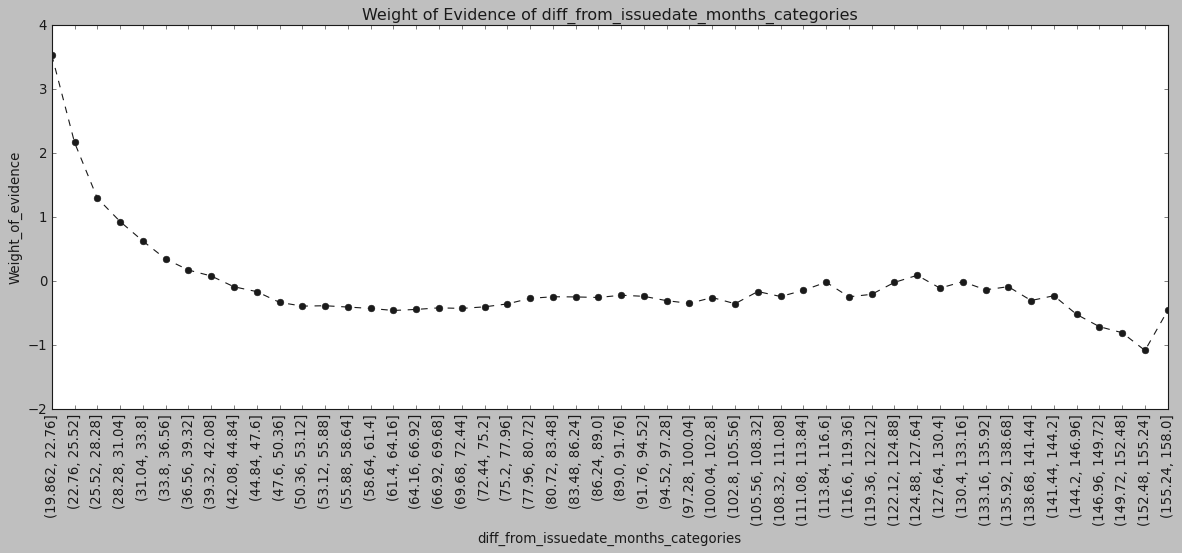

In [106]:
plot_by_woe(issue_month_woe, rotation=90)

In [107]:
df['diff_from_issuedate_months:17-23'] = np.where(df['diff_from_issuedate_months'].isin(range(17, 24)), 1, 0)
df['diff_from_issuedate_months:23-29'] = np.where(df['diff_from_issuedate_months'].isin(range(23, 30)), 1, 0)
df['diff_from_issuedate_months:29-34'] = np.where(df['diff_from_issuedate_months'].isin(range(29, 35)), 1, 0)
df['diff_from_issuedate_months:34-40'] = np.where(df['diff_from_issuedate_months'].isin(range(34, 41)), 1, 0)
df['diff_from_issuedate_months:40-73'] = np.where(df['diff_from_issuedate_months'].isin(range(40, 74)), 1, 0)
df['diff_from_issuedate_months:73-84'] = np.where(df['diff_from_issuedate_months'].isin(range(73, 85)), 1, 0)
df['diff_from_issuedate_months:84>'] = np.where(df['diff_from_issuedate_months'].isin(range(84,int(df['diff_from_issuedate_months'].max()))), 1, 0)

### Interest Rate

In [108]:
df['int_rate_categories'] = pd.cut(df['int_rate'], 4)

In [109]:
int_woe = get_weight_of_evidence_numeric(data=df, column='int_rate_categories', target= 'good_bad')
int_woe

,int_rate_categories,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,"(5.284, 11.73]",980184,0.937920,0.433582,919334.0,60850.0,0.465174,0.214001,0.776429,0.344584
1,"(11.73, 18.15]",955544,0.849737,0.422682,811961.0,143583.0,0.410844,0.504962,-0.206270,0.344584
2,"(18.15, 24.57]",264142,0.762151,0.116842,201316.0,62826.0,0.101864,0.220951,-0.774302,0.344584
3,"(24.57, 30.99]",60798,0.718987,0.026894,43713.0,17085.0,0.022118,0.060086,-0.999364,0.344584


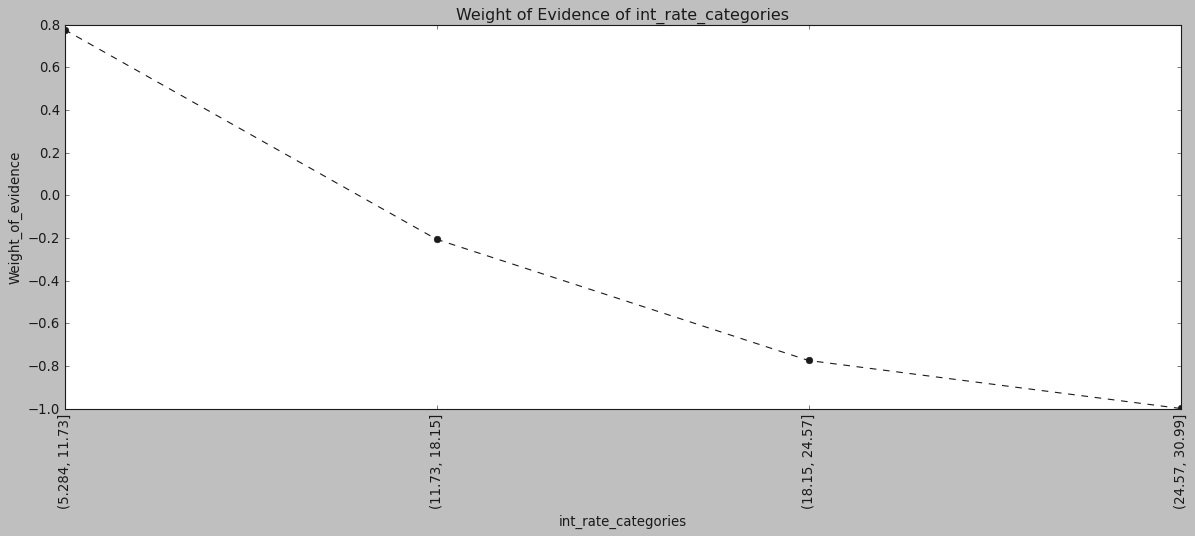

In [110]:
plot_by_woe(int_woe, rotation=90)

Looking at the above graph, we can see that as the interest rate is increasing, the chances of default is also increasing.

In [111]:
df['int_rate:<10'] = np.where(df['int_rate'] <= 10, 1, 0)
df['int_rate:10-15'] = np.where((df['int_rate'] > 10) & (df['int_rate'] <= 15), 1, 0)
df['int_rate:15-20'] = np.where((df['int_rate'] > 15) & (df['int_rate'] <= 20), 1, 0)
df['int_rate:>20'] = np.where(df['int_rate'] > 20, 1, 0)

### Funded Amount

In [112]:
df['funded_amnt_factor'] = pd.cut(df['funded_amnt'], 25)

In [113]:
funded_woe = get_weight_of_evidence_numeric(data=df, column='funded_amnt_factor', target='good_bad')
funded_woe

,funded_amnt_factor,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,"(460.5, 2080.0]",46118,0.911943,0.020400,42057.0,4061.0,0.021280,0.014282,0.398788,0.034517
1,"(2080.0, 3660.0]",91299,0.898926,0.040386,82071.0,9228.0,0.041527,0.032454,0.246533,0.034517
2,"(3660.0, 5240.0]",167020,0.893288,0.073881,149197.0,17823.0,0.075492,0.062681,0.185969,0.034517
3,"(5240.0, 6820.0]",139704,0.890891,0.061798,124461.0,15243.0,0.062976,0.053608,0.161063,0.034517
4,"(6820.0, 8400.0]",180576,0.883124,0.079877,159471.0,21105.0,0.080691,0.074223,0.083543,0.034517
5,"(8400.0, 9980.0]",85750,0.871055,0.037931,74693.0,11057.0,0.037794,0.038886,-0.028486,0.034517
6,"(9980.0, 11560.0]",264154,0.880437,0.116848,232571.0,31583.0,0.117679,0.111073,0.057767,0.034517
7,"(11560.0, 13140.0]",178439,0.872388,0.078932,155668.0,22771.0,0.078766,0.080083,-0.016571,0.034517
8,"(13140.0, 14720.0]",80545,0.849128,0.035629,68393.0,12152.0,0.034606,0.042737,-0.211032,0.034517
9,"(14720.0, 16300.0]",216969,0.869585,0.095976,188673.0,28296.0,0.095467,0.099513,-0.041514,0.034517


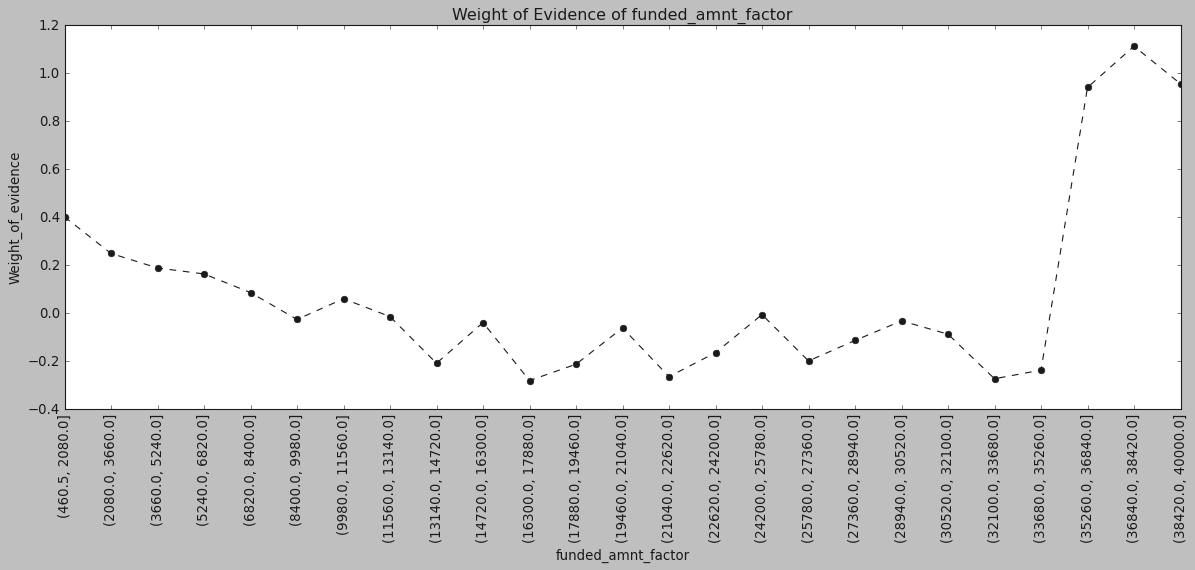

In [114]:
plot_by_woe(funded_woe, rotation=90)

In [115]:
df['funded_amnt_450-4000'] = np.where((df['funded_amnt'] > 450) & (df['funded_amnt'] <= 4000) , 1, 0)
df['funded_amnt_4000-8000'] = np.where((df['funded_amnt'] > 4000) & (df['funded_amnt'] <= 8000) , 1, 0)
df['funded_amnt_8000-12000'] = np.where((df['funded_amnt'] > 8000) & (df['funded_amnt'] <= 12000) , 1, 0)
df['funded_amnt_12000-16000'] = np.where((df['funded_amnt'] > 12000) & (df['funded_amnt'] <= 16000) , 1, 0)
df['funded_amnt_16000-20000'] = np.where((df['funded_amnt'] > 16000) & (df['funded_amnt'] <= 20000) , 1, 0)
df['funded_amnt_20000-25000'] = np.where((df['funded_amnt'] > 20000) & (df['funded_amnt'] <= 25000) , 1, 0)
df['funded_amnt_25000-30000'] = np.where((df['funded_amnt'] > 25000) & (df['funded_amnt'] <= 30000) , 1, 0)
df['funded_amnt_30000-35000'] = np.where((df['funded_amnt'] > 30000) & (df['funded_amnt'] <= 35000) , 1, 0)
df['funded_amnt_>35000'] = np.where(df['funded_amnt'] > 35000, 1, 0)

### Annual Income

In [116]:
df['annual_inc_factors'] = pd.cut(df['annual_inc'], 100)

annual_woe = get_weight_of_evidence_numeric(df, column='annual_inc_factors', target='good_bad')
annual_woe

,annual_inc_factors,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,"(-110000.0, 1100000.0]",2260170,0.874211,9.997797e-01,1975865.0,284305.0,9.997678e-01,0.999863,-0.000095,inf
1,"(1100000.0, 2200000.0]",306,0.944444,1.353582e-04,289.0,17.0,1.462311e-04,0.000060,0.894404,inf
2,"(2200000.0, 3300000.0]",42,0.857143,1.857858e-05,36.0,6.0,1.821564e-05,0.000021,-0.147050,inf
3,"(3300000.0, 4400000.0]",38,0.868421,1.680919e-05,33.0,5.0,1.669767e-05,0.000018,-0.051739,inf
4,"(4400000.0, 5500000.0]",28,0.892857,1.238572e-05,25.0,3.0,1.264975e-05,0.000011,0.181454,inf
5,"(5500000.0, 6600000.0]",29,0.896552,1.282807e-05,26.0,3.0,1.315574e-05,0.000011,0.220675,inf
6,"(6600000.0, 7700000.0]",24,0.958333,1.061633e-05,23.0,1.0,1.163777e-05,0.000004,1.196685,inf
7,"(7700000.0, 8800000.0]",14,0.928571,6.192860e-06,13.0,1.0,6.577869e-06,0.000004,0.626140,inf
8,"(8800000.0, 9900000.0]",13,0.769231,5.750513e-06,10.0,3.0,5.059899e-06,0.000011,-0.734836,inf
9,"(9900000.0, 11000000.0]",2,1.000000,8.846943e-07,2.0,0.0,1.011980e-06,0.000000,inf,inf


In [117]:
annual_income_df = df.loc[(df['annual_inc'] > 0) & (df['annual_inc'] <= 200000) , :]
annual_income_df['annual_inc_factors'] = pd.cut(annual_income_df['annual_inc'], 20)


In [118]:
annual_woe = get_weight_of_evidence_numeric(annual_income_df, column='annual_inc_factors', target='good_bad')
annual_woe

,annual_inc_factors,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,"(-199.64, 10000.342]",4288,0.889459,0.001944,3814.0,474.0,0.001981,0.001693,0.157076,0.028924
1,"(10000.342, 20000.324]",36917,0.852697,0.016738,31479.0,5438.0,0.016348,0.019420,-0.172241,0.028924
2,"(20000.324, 30000.306]",127934,0.846593,0.058004,108308.0,19626.0,0.056247,0.070089,-0.220027,0.028924
3,"(30000.306, 40000.288]",240340,0.851906,0.108968,204747.0,35593.0,0.106329,0.127112,-0.178525,0.028924
4,"(40000.288, 50000.27]",303513,0.857604,0.137610,260294.0,43219.0,0.135176,0.154346,-0.132619,0.028924
5,"(50000.27, 60000.252]",302831,0.863716,0.137300,261560.0,41271.0,0.135833,0.147389,-0.081647,0.028924
6,"(60000.252, 70000.234]",254668,0.871052,0.115464,221829.0,32839.0,0.115200,0.117276,-0.017861,0.028924
7,"(70000.234, 80000.216]",228238,0.877991,0.103481,200391.0,27847.0,0.104067,0.099449,0.045395,0.028924
8,"(80000.216, 90000.198]",170545,0.883544,0.077323,150684.0,19861.0,0.078253,0.070929,0.098276,0.028924
9,"(90000.198, 100000.18]",142579,0.889837,0.064644,126872.0,15707.0,0.065887,0.056094,0.160922,0.028924


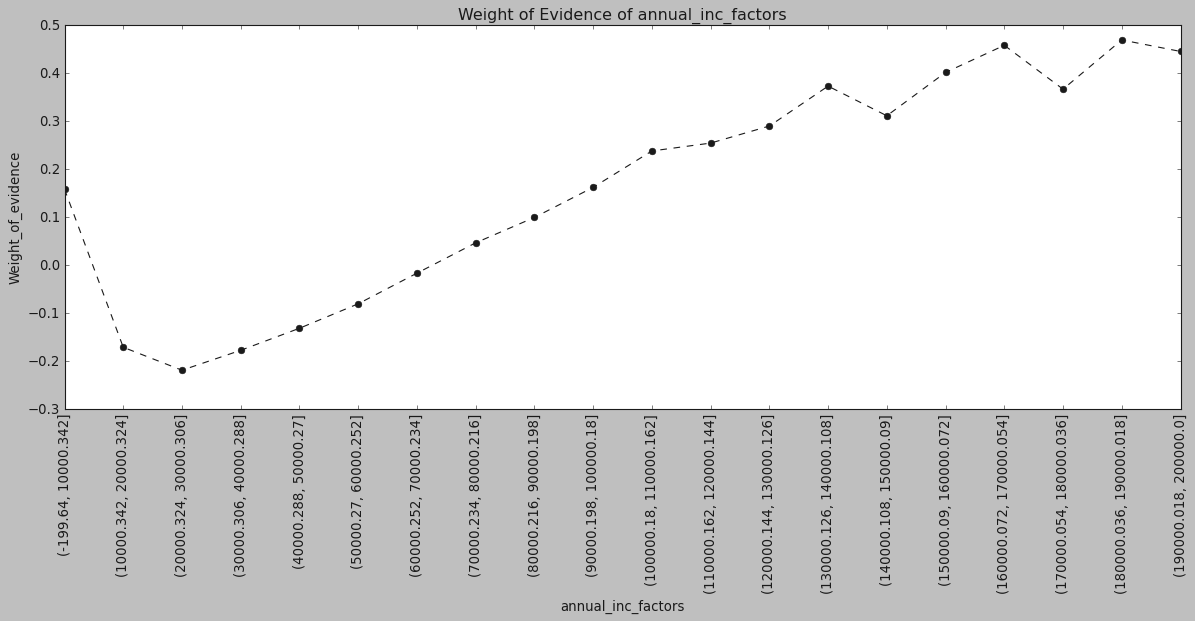

In [119]:
plot_by_woe(annual_woe, rotation=90)

Above graph suggests that higher annual income results in lower chances of default. The first category has extremely low number of observations so we will ignore this category.

In [120]:
df['annual_inc_<20k'] = np.where(df['annual_inc'] < 20000, 1, 0)
df['annual_inc_20k-30k'] = np.where((df['annual_inc'] >= 20000) & (df['annual_inc'] < 30000), 1, 0)
df['annual_inc_30k-40k'] = np.where((df['annual_inc'] >= 30000) & (df['annual_inc'] < 40000), 1, 0)
df['annual_inc_40k-50k'] = np.where((df['annual_inc'] >= 40000) & (df['annual_inc'] < 50000), 1, 0)
df['annual_inc_50k-60k'] = np.where((df['annual_inc'] >= 50000) & (df['annual_inc'] < 60000), 1, 0)
df['annual_inc_60k-70k'] = np.where((df['annual_inc'] >= 60000) & (df['annual_inc'] < 70000), 1, 0)
df['annual_inc_70k-80k'] = np.where((df['annual_inc'] >= 70000) & (df['annual_inc'] < 80000), 1, 0)
df['annual_inc_80k-90k'] = np.where((df['annual_inc'] >= 80000) & (df['annual_inc'] < 90000), 1, 0)
df['annual_inc_90k-100k'] = np.where((df['annual_inc'] >= 90000) & (df['annual_inc'] < 100000), 1, 0)
df['annual_inc_100k-120k'] = np.where((df['annual_inc'] >= 100000) & (df['annual_inc'] < 120000), 1, 0)
df['annual_inc_120k-140k'] = np.where((df['annual_inc'] >= 120000) & (df['annual_inc'] < 140000), 1, 0)
df['annual_inc_140k-160k'] = np.where((df['annual_inc'] >= 140000) & (df['annual_inc'] < 160000), 1, 0)
df['annual_inc_160k-180k'] = np.where((df['annual_inc'] >= 160000) & (df['annual_inc'] < 180000), 1, 0)
df['annual_inc_>180k'] = np.where(df['annual_inc'] >= 180000, 1, 0)

### DTI
This column has missing values and skewness related issues. In order to preprocess this column, I will remove the observations with missing values and add all the extreme values in one category.

In [121]:
dti_df = df[pd.notnull(df['dti'])]
dti_df = df.loc[(df['dti'] < 39), :]

In [122]:
dti_df['dti_factors'] = pd.cut(dti_df['dti'], 10)

dti_woe = get_weight_of_evidence_numeric(data=dti_df, column='dti_factors', target='good_bad')
dti_woe

,dti_factors,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,"(-1.04, 2.999]",49766,0.902845,0.022379,44931.0,4835.0,0.023121,0.017240,0.293541,0.044665
1,"(2.999, 6.998]",160085,0.905563,0.071989,144967.0,15118.0,0.074599,0.053904,0.324915,0.044665
2,"(6.998, 10.997]",277924,0.900757,0.124980,250342.0,27582.0,0.128824,0.098346,0.269959,0.044665
3,"(10.997, 14.996]",367164,0.891098,0.165111,327179.0,39985.0,0.168364,0.142570,0.166298,0.044665
4,"(14.996, 18.995]",383464,0.879352,0.172441,337200.0,46264.0,0.173521,0.164958,0.050607,0.044665
5,"(18.995, 22.994]",344189,0.866614,0.154779,298279.0,45910.0,0.153492,0.163696,-0.064359,0.044665
6,"(22.994, 26.993]",273503,0.853073,0.122992,233318.0,40185.0,0.120064,0.143283,-0.176797,0.044665
7,"(26.993, 30.992]",195694,0.840445,0.088002,164470.0,31224.0,0.084635,0.111332,-0.274164,0.044665
8,"(30.992, 34.991]",124181,0.826866,0.055843,102681.0,21500.0,0.052839,0.076660,-0.372131,0.044665
9,"(34.991, 38.99]",47770,0.835545,0.021482,39914.0,7856.0,0.020539,0.028011,-0.310256,0.044665


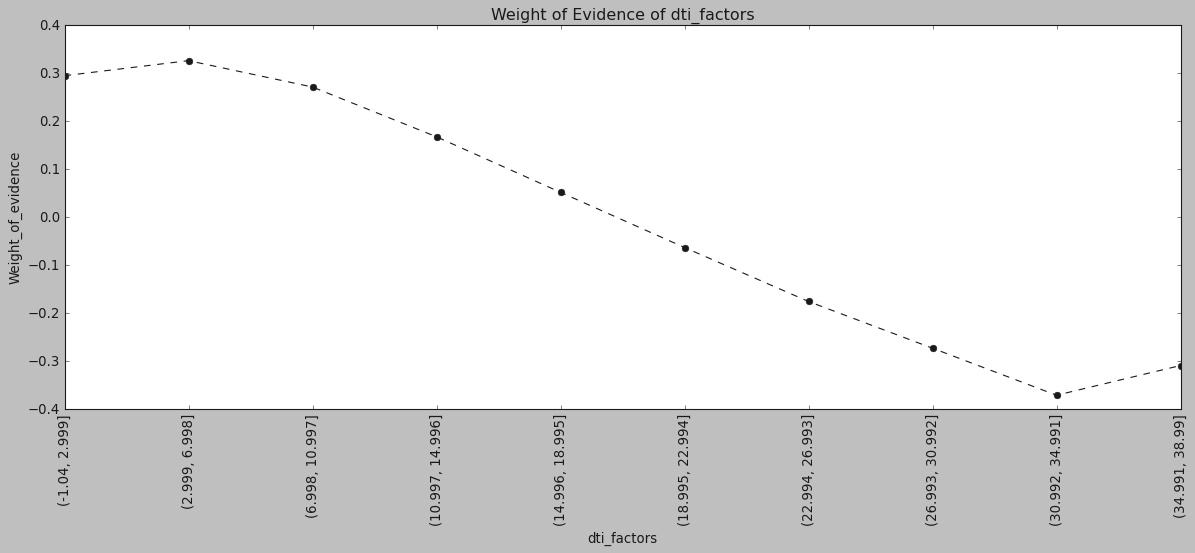

In [123]:
plot_by_woe(dti_woe, rotation=90)

In [124]:
df['dti_-1-6.998'] = np.where((df['dti'] > -1) & (df['dti'] <= 6.998), 1, 0)
df['dti_6.998-14.996'] = np.where((df['dti'] > 6.998) & (df['dti'] <= 14.996), 1, 0)
df['dti_14.996-22.994'] = np.where((df['dti'] > 14.996) & (df['dti'] <= 22.994), 1, 0)
df['dti_22.994-30.992'] = np.where((df['dti'] > 22.994) & (df['dti'] <= 30.992), 1, 0)
df['dti_30.992-38.99'] = np.where((df['dti'] > 30.992) & (df['dti'] <= 38.99), 1, 0)
df['dti_39.99>'] = np.where(df['dti'] > 39.99, 1, 0)

### Total Acc

In [125]:
df['total_acc_category'] = pd.cut(df['total_acc'], 50)

total_acc_woe = get_weight_of_evidence_numeric(df,'total_acc_category', 'good_bad')
total_acc_woe

,total_acc_category,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,"(-0.176, 3.52]",5627,0.905278,2.489087e-03,5094.0,533.0,2.577513e-03,0.001874,0.318488,inf
1,"(3.52, 7.04]",82183,0.887957,3.635341e-02,72975.0,9208.0,3.692461e-02,0.032383,0.131235,inf
2,"(7.04, 10.56]",138704,0.881582,6.135532e-02,122279.0,16425.0,6.187194e-02,0.057765,0.068692,inf
3,"(10.56, 14.08]",269744,0.877736,1.193205e-01,236764.0,32980.0,1.198002e-01,0.115986,0.032353,inf
4,"(14.08, 17.6]",238179,0.875946,1.053578e-01,208632.0,29547.0,1.055657e-01,0.103913,0.015781,inf
5,"(17.6, 21.12]",327683,0.875425,1.449496e-01,286862.0,40821.0,1.451493e-01,0.143562,0.010996,inf
6,"(21.12, 24.64]",232459,0.873969,1.028276e-01,203162.0,29297.0,1.027979e-01,0.103034,-0.002290,inf
7,"(24.64, 28.16]",268652,0.872977,1.188374e-01,234527.0,34125.0,1.186683e-01,0.120013,-0.011269,inf
8,"(28.16, 31.68]",164834,0.871641,7.291385e-02,143676.0,21158.0,7.269861e-02,0.074410,-0.023266,inf
9,"(31.68, 35.2]",170863,0.871371,7.558076e-02,148885.0,21978.0,7.533431e-02,0.077294,-0.025677,inf


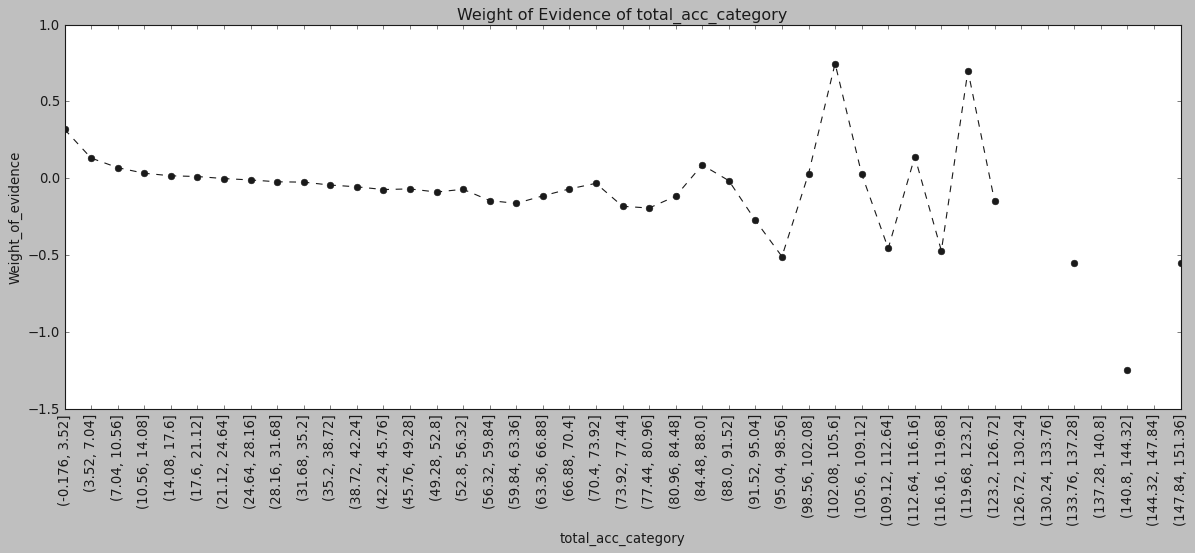

In [126]:
plot_by_woe(total_acc_woe, rotation=90)

In [127]:
df['total_acc_-0.176-7.04'] = np.where((df['total_acc'] > -0.2) & (df['total_acc'] <= 7.04), 1, 0)
df['total_acc_7.04-14.08'] = np.where((df['total_acc'] > 7.04) & (df['total_acc'] <= 14.08), 1, 0)
df['total_acc_14.08-21.12'] = np.where((df['total_acc'] > 14.08) & (df['total_acc'] <= 21.12), 1, 0)
df['total_acc_21.12-24.64'] = np.where((df['total_acc'] > 21.12) & (df['total_acc'] <= 24.64), 1, 0)
df['total_acc_24.64-28.16'] = np.where((df['total_acc'] > 24.64) & (df['total_acc'] <= 28.16), 1, 0)
df['total_acc_28.16-35.2'] = np.where((df['total_acc'] > 28.16) & (df['total_acc'] <= 35.2), 1, 0)
df['total_acc_35.2-42.24'] = np.where((df['total_acc'] > 35.2) & (df['total_acc'] <= 42.24), 1, 0)
df['total_acc_42.24-49.28'] = np.where((df['total_acc'] > 42.24) & (df['total_acc'] <= 49.28), 1, 0)
df['total_acc_49.28-56.32'] = np.where((df['total_acc'] > 49.28) & (df['total_acc'] <= 56.32), 1, 0)
df['total_acc_56.32-66.88'] = np.where((df['total_acc'] > 56.32) & (df['total_acc'] <= 66.88), 1, 0)
df['total_acc_66.88>'] = np.where(df['total_acc'] > 66.88, 1, 0)

### Account now Delinq

In [128]:
df['acc_now_delinq_category'] = pd.cut(df['acc_now_delinq'], 5)
acc_delinq_woe = get_weight_of_evidence_numeric(df, 'acc_now_delinq', 'good_bad')
acc_delinq_woe

,acc_now_delinq,number_of_obs,prop_good,percentage_of_total,number_of_good,number_of_bad,prop_n_good,prop_n_bad,weight_of_evidence,information_value
0,0.0,2251886,0.874385,9.961153e-01,1969016.0,282870.0,9.963022e-01,0.994816,0.001493,inf
1,1.0,8293,0.833353,3.668385e-03,6911.0,1382.0,3.496896e-03,0.004860,-0.329226,inf
2,2.0,421,0.819477,1.862281e-04,345.0,76.0,1.745665e-04,0.000267,-0.425998,inf
3,3.0,50,0.760000,2.211736e-05,38.0,12.0,1.922762e-05,0.000042,-0.786130,inf
4,4.0,11,0.818182,4.865818e-06,9.0,2.0,4.553909e-06,0.000007,-0.434732,inf
5,5.0,3,0.666667,1.327041e-06,2.0,1.0,1.011980e-06,0.000004,-1.245662,inf
6,6.0,2,0.500000,8.846943e-07,1.0,1.0,5.059899e-07,0.000004,-1.938809,inf
7,7.0,1,1.000000,4.423471e-07,1.0,0.0,5.059899e-07,0.000000,inf,inf
8,14.0,1,1.000000,4.423471e-07,1.0,0.0,5.059899e-07,0.000000,inf,inf


In [129]:
df['acc_now_delinq_0.0'] = np.where(df['acc_now_delinq'] == 0.0, 1, 0)

# Modeling
I would remove the categories with lowers weight of evidence in each column. 

In [130]:
cols = ['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
#        'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
#        'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
#        'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
#        'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
        'purpose_renewableenergy_moving', 'purpose_debt_consolidation',
        'purpose_home_improvement', 'purpose_major_purchase','purpose_medical_other',
        'purpose_wedding_house_vacation', 'purpose_car', 'purpose_credit_card','home_ownership_ANY',
        'home_ownership_MORTGAGE','home_ownership_OWN','home_ownership_RENT','verification_status_Not Verified',
        'verification_status_Source Verified','initial_list_status_w','addr_state_IA_AL_AR',
        'addr_state_MS_LA_OK','addr_state_NV_NM','addr_state_HI_SD','addr_state_NC_MD','addr_state_IN_TN',
        'addr_state_PA_NJ','addr_state_KY_MI_VA_AK','addr_state_MN_AZ_OH', 'addr_state_NE_DE', 'addr_state_MA_UT',
        'addr_state_WI_GA_RI','addr_state_MT_WY_KS_WA_CT_CO_ND_SC',
        'addr_state_WV_OR_NH_DC','addr_state_VT_ID_ME', 'addr_state_NY',
        'addr_state_CA', 'addr_state_FL', 'addr_state_TX', 'term_36', 'emp_length:1',
       'emp_length:2-3', 'emp_length:4-6', 'emp_length:7-9', 'emp_length:10', 'diff_from_issuedate_months:17-23',
        'diff_from_issuedate_months:23-29','diff_from_issuedate_months:29-34', 'diff_from_issuedate_months:34-40',
        'diff_from_issuedate_months:40-73','diff_from_issuedate_months:73-84', 'diff_from_issuedate_months:84>',
       'int_rate:<10','int_rate:10-15','int_rate:15-20', 'funded_amnt_450-4000','funded_amnt_4000-8000',
        'funded_amnt_8000-12000', 'funded_amnt_12000-16000','funded_amnt_16000-20000','funded_amnt_20000-25000',
        'funded_amnt_25000-30000', 'funded_amnt_30000-35000','annual_inc_20k-30k','annual_inc_30k-40k','annual_inc_40k-50k','annual_inc_50k-60k','annual_inc_60k-70k',
        'annual_inc_70k-80k','annual_inc_80k-90k','annual_inc_90k-100k','annual_inc_100k-120k','annual_inc_120k-140k',
        'annual_inc_140k-160k','annual_inc_160k-180k','annual_inc_>180k','dti_-1-6.998','dti_6.998-14.996',
        'dti_14.996-22.994','dti_22.994-30.992','dti_30.992-38.99','dti_39.99>', 'total_acc_-0.176-7.04',
        'total_acc_7.04-14.08','total_acc_14.08-21.12','total_acc_21.12-24.64','total_acc_24.64-28.16', 
        'total_acc_28.16-35.2', 'total_acc_35.2-42.24','total_acc_42.24-49.28', 'total_acc_49.28-56.32',
        'total_acc_56.32-66.88', 'acc_now_delinq_0.0']
X = df[cols]
y = df['good_bad']

print(X.shape)
print(y.shape)

(2260668, 94)
(2260668,)


In [131]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### PD (Probability of Default)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1695501, 94)
(1695501,)
(565167, 94)
(565167,)


In [133]:
x_constant = sm.add_constant(X_train)
reg_logit = sm.Logit(y_train, x_constant)
reg_logit_fit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.332681
         Iterations 9


#### Summary of Logistic Regression

In [134]:
reg_logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               good_bad   No. Observations:              1695501
Model:                          Logit   Df Residuals:                  1695406
Method:                           MLE   Df Model:                           94
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                  0.1198
Time:                        08:41:11   Log-Likelihood:            -5.6406e+05
converged:                       True   LL-Null:                   -6.4087e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4133      0.216     -1.916      0.055      -0.836       0.009
grade_A                                 2.0136      0.032     63.922      0.000       1.952       2.075
grade_B                                 1.4178      0.028     50.190      0.000       1.362       1.473
grade_C                                 1.0162      0.027     37.795      0.000       0.964       1.069
grade_D                                 0.7223      0.025     28.398      0.000       0.672       0.772
grade_E                                 0.4403      0.024     18.599      0.000       0.394       0.487
grade_F                                 0.1773      0.025      7.063      0.000       0.128       0.227
purpose_renewableenergy_moving          0.2774      0.033      8.500      0.000       0.213       0.341
purpose_debt_consolidation              0.3060      0.020     15.396      0.000       0.267       0.345
purpose_home_improvement                0.2503      0.022     11.359      0.000       0.207       0.293
purpose_major_purchase                  0.2505      0.026      9.706      0.000       0.200       0.301
purpose_medical_other                   0.3058      0.022     14.195      0.000       0.264       0.348
purpose_wedding_house_vacation          0.3197      0.029     11.152      0.000       0.263       0.376
purpose_car                             0.4275      0.033     12.931      0.000       0.363       0.492
purpose_credit_card                     0.3409      0.020     16.648      0.000       0.301       0.381
home_ownership_ANY                      0.4712      0.251      1.876      0.061      -0.021       0.963
home_ownership_MORTGAGE                 0.3158      0.202      1.562      0.118      -0.081       0.712
home_ownership_OWN                      0.1977      0.202      0.977      0.328      -0.199       0.594
home_ownership_RENT                     0.0445      0.202      0.220      0.826      -0.352       0.441
verification_status_Not Verified        0.1858      0.007     27.243      0.000       0.172       0.199
verification_status_Source Verified     0.0131      0.006      2.229      0.026       0.002       0.025
initial_list_status_w                   0.0417      0.006      7.516      0.000       0.031       0.053
addr_state_IA_AL_AR                    -0.2556      0.019    -13.220      0.000      -0.293      -0.218
addr_state_MS_LA_OK                    -0.2581      0.018    -14.608      0.000      -0.293      -0.223
addr_state_NV_NM                       -0.1959      0.020     -9.976      0.000      -0.234      -0.157
addr_state_HI_SD                       -0.0492      0.030     -1.619      0.106      -0.109       0.010
addr_state_NC_MD                       -0.1366      0.015     -9.175      0.000      -0.166      -0.107
addr_state_IN_TN                       -0.1029      0.017     -6.034      0.000      -0.136      -0.069
addr_state_PA_NJ 

### Sklearn

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, confusion_matrix, classification_report

#### Logistic Regression

In [136]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [137]:
score = logistic.score(X_train, y_train)
print(score)

0.8744347540933329


In [138]:
features = X_train.columns.values
model_summary = pd.DataFrame(columns=['features'], data=features)
model_summary['coefficient'] = np.transpose(logistic.coef_)
model_summary

,features,coefficient
0,grade_A,2.006816
1,grade_B,1.412416
2,grade_C,1.011361
3,grade_D,0.718260
4,grade_E,0.436061
5,grade_F,0.172746
6,purpose_renewableenergy_moving,0.272288
7,purpose_debt_consolidation,0.301644
8,purpose_home_improvement,0.246507
9,purpose_major_purchase,0.245956


#### Prediction

In [139]:
prediction = logistic.predict(X_test)

accuracy = accuracy_score(y_test, prediction)
print('Accuracy : %.3f' % accuracy)

Accuracy : 0.874


In [140]:
cm = confusion_matrix(y_test, prediction)

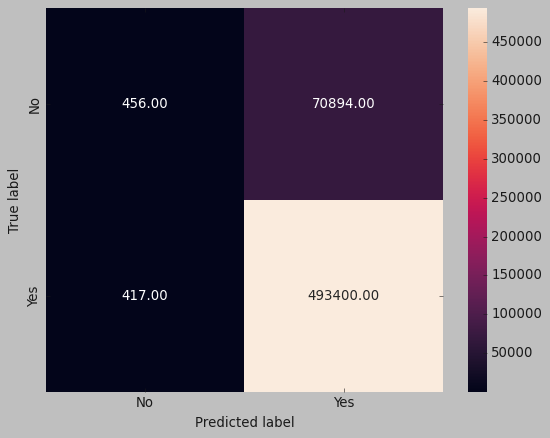

In [141]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)
plt.show()

In [142]:
prediction_probability = logistic.predict_proba(X_test)

auc = roc_auc_score(y_test, prediction_probability[:, 1])
print('AUC: %.3f' % auc)

AUC: 0.749


So we know that our model is not just randomly predicting the target variable. I will use other models with default parameters to compare the result with logistic regression model

### Classification Report

In [143]:
print(classification_report(y_test, prediction, digits= 2))

              precision    recall  f1-score   support

           0       0.52      0.01      0.01     71350
           1       0.87      1.00      0.93    493817

    accuracy                           0.87    565167
   macro avg       0.70      0.50      0.47    565167
weighted avg       0.83      0.87      0.82    565167



### Gini Coefficient

In [144]:
gini = (2 * auc) - 1
print('Gini Coefficient : %.3f' % gini)

Gini Coefficient : 0.497


### Roc Curve

In [145]:
proba = prediction_probability[:, 1]

In [146]:
fpr, tpr,thresholds = roc_curve(y_test, proba)

ROC AUC=0.749


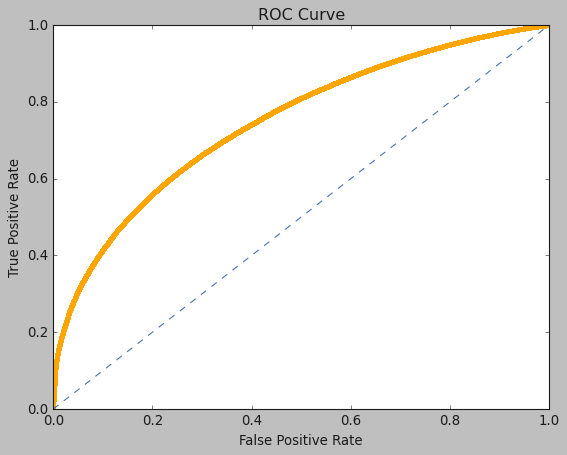

In [147]:
print('ROC AUC=%.3f' % (auc))
plt.plot(fpr, tpr, marker='.', label='Logistic', color = 'orange')
plt.plot([0, 1], [0, 1],'b--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Predict on the entire dataset

In [148]:
prediction_probability = logistic.predict_proba(X)

In [149]:
df['Probability_of_Default'] = prediction_probability[:, 0]

In [ ]:
df.to_csv('preprocessed_data.csv', index = False)

With other machine learning models like xgboost or random forest and class balancing, we can achieve higher AUC. 